# Import and initialize

## Importing modules

In [62]:
MDAC?

In [4]:
%matplotlib notebook

from IPython.display import clear_output

import sys
sys.path.append(r"D:\OneDrive\BF3\Code");
sys.path.append(r"D:\OneDrive\BF3\Code\labtools-master")

import os
import time
import datetime
import numpy as np
import matplotlib as mpl
# import utils

from collections import OrderedDict
from importlib import reload
from matplotlib import pyplot as plt

# from labtools import mplplots; reload(mplplots)
# from labtools.mplplots.init_nb_plotting import *
# from labtools.mplplots import tools as mpltools

import qcodes as qc
from qcodes.dataset.database import initialise_database, get_DB_location


from qcodes import new_experiment, Station, Instrument
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id
from qcodes.dataset.data_set import DataSet
from qcodes.dataset.data_set import load_by_id
from qcodes.dataset.data_export import get_data_by_id

from pytopo.qctools import instruments as instools

#from v2_dataset_tools.experiments import do_experiment, get_results_from_db_path

# from MDAC import MDAC 
# from qcodes.instrument_drivers.Keysight.Keysight_34465A import Keysight_34465A

#from qcodes.instrument_drivers.stanford_research.SR860 import SR860
#from qcodes.instrument_drivers.QuTech.IVVI import IVVI
#from qcodes.instrument_drivers.yokogawa.GS200 import GS200

from pytopo.sweep import sweep, measure, nest, chain, szip, getter, setter, time_trace, do_experiment
from pytopo.qctools.instruments import create_inst

In [5]:
qc.config.subscription.default_subscribers = [] # no plottr needed

## Database configuration

In [3]:
from qcodes.dataset.sqlite_base import transaction, one

def get_timestamp(run_id):
    DB = qc.config["core"]["db_location"]
    
    d = DataSet(DB)
    sql = """
    SELECT run_timestamp
    FROM
      runs
    WHERE
      run_id= ?
    """
    c = transaction(d.conn, sql, run_id)
    run_timestamp = one(c, 'run_timestamp')
    return run_timestamp

def timestamp_to_fmt(ts, fmt):
    return time.strftime(fmt, time.gmtime(ts))

def img_basepath(run_id):
    ts = get_timestamp(run_id)
    return timestamp_to_fmt(ts, qc.config['user']['img_dir'] + str(run_id).zfill(4) + '_')

def ds_title(run_id):
    return "{} #{}".format(os.path.abspath(qc.config['core']['db_location']), run_id)

qc.config['user']['img_dir'] = "d:/data/images/%Y-%m/%Y-%m-%d/"
qc.config.save_to_cwd()

In [4]:
qc.config["core"]["db_location"] = datetime.date.today().strftime(r'D:\OneDrive\BF3\Data\experiments_%Y-%m-%d.db')
# automatically uses a different DB file for each month
initialise_database()
# creates a new DB file if nonexistant; leaves it untouched if file already exists

## Wiring check

In [5]:
sys.path.append(r"D:\OneDrive\BF3\Code\BF3")
from QT3_PCB.pad_conversion import Gen5_to_BoB

In [6]:
Gen5_to_BoB(45,11,17,15,32)

pad 45 is matrix element(3, 15)
pad 11 is matrix element(4, 20)
pad 17 is matrix element(4, 17)
pad 15 is matrix element(4, 18)
pad 32 is matrix element(3, 9)


[(3, 15), (4, 20), (4, 17), (4, 18), (3, 9)]

## Initialize instruments

### Lock-in

In [5]:
station = Station()

sys.path.append(r"D:\OneDrive\BF3\Code\StationQ\MDAC\Driver")

from qcodes.instrument_drivers.stanford_research.SR865 import SR865
lockin1 = create_inst(SR865, "lockin1", "GPIB0::4::INSTR")
lockin1.amplitude.vals._min_value = 0
lockin2 = create_inst(SR865, "lockin2", "GPIB0::5::INSTR")
lockin2.amplitude.vals._min_value = 0
lockin3 = create_inst(SR865, "lockin3", "GPIB0::6::INSTR")
lockin3.amplitude.vals._min_value = 0
lockin4 = create_inst(SR865, "lockin4", "GPIB0::7::INSTR")
lockin4.amplitude.vals._min_value = 0

station = qc.Station(lockin1, lockin2, lockin3, lockin4)

Connected to: Stanford_Research_Systems SR860 (serial:003225, firmware:V1.47) in 0.66s
Connected to: Stanford_Research_Systems SR860 (serial:003214, firmware:V1.47) in 0.06s
Connected to: Stanford_Research_Systems SR860 (serial:003223, firmware:v1.51) in 0.05s
Connected to: Stanford_Research_Systems SR860 (serial:003105, firmware:V1.47) in 0.06s


In [6]:
print('lockin1 excitation amplitude =', lockin1.amplitude(), 'V')
print('lockin1 DC bias =', lockin1.sine_outdc(), 'V')
print('lockin1 frequency =', lockin1.frequency(), 'Hz')
print('lockin1 phase =', lockin1.phase(), 'deg')
print('lockin1 X =', lockin1.X(), 'V')
print('lockin1 Y =', lockin1.Y(), 'V')
print('lockin1 R =', lockin1.R(), 'V')
print('lockin1 P =', lockin1.P(), 'deg')

print('lockin2 excitation amplitude =', lockin2.amplitude(), 'V')
print('lockin2 DC bias =', lockin2.sine_outdc(), 'V')
print('lockin2 frequency =', lockin2.frequency(), 'Hz')
print('lockin2 phase =', lockin2.phase(), 'deg')
print('lockin2 X =', lockin2.X(), 'V')
print('lockin2 Y =', lockin2.Y(), 'V')
print('lockin2 R =', lockin2.R(), 'V')
print('lockin2 P =', lockin2.P(), 'deg')

print('lockin3 excitation amplitude =', lockin3.amplitude(), 'V')
print('lockin3 DC bias =', lockin3.sine_outdc(), 'V')
print('lockin3 frequency =', lockin3.frequency(), 'Hz')
print('lockin3 phase =', lockin3.phase(), 'deg')
print('lockin3 X =', lockin3.X(), 'V')
print('lockin3 Y =', lockin3.Y(), 'V')
print('lockin3 R =', lockin3.R(), 'V')
print('lockin3 P =', lockin3.P(), 'deg')

print('lockin4 excitation amplitude =', lockin4.amplitude(), 'V')
print('lockin4 DC bias =', lockin4.sine_outdc(), 'V')
print('lockin4 frequency =', lockin4.frequency(), 'Hz')
print('lockin4 phase =', lockin4.phase(), 'deg')
print('lockin4 X =', lockin4.X(), 'V')
print('lockin4 Y =', lockin4.Y(), 'V')
print('lockin4 R =', lockin4.R(), 'V')
print('lockin4 P =', lockin4.P(), 'deg')

lockin1 excitation amplitude = 0.0019999998622 V
lockin1 DC bias = 0.0 V
lockin1 frequency = 17.6587 Hz
lockin1 phase = 0.0 deg
lockin1 X = 1.7282285626e-05 V
lockin1 Y = -2.554911589e-06 V
lockin1 R = 1.7470540115e-05 V
lockin1 P = -8.4102077484 deg
lockin2 excitation amplitude = 0.0 V
lockin2 DC bias = 0.0 V
lockin2 frequency = 21.0081 Hz
lockin2 phase = -180.0 deg
lockin2 X = 3.4930455968e-06 V
lockin2 Y = 1.6648366e-05 V
lockin2 R = 2.119797864e-05 V
lockin2 P = 68.386054993 deg
lockin3 excitation amplitude = 0.0 V
lockin3 DC bias = 0.0 V
lockin3 frequency = 19.33 Hz
lockin3 phase = 0.0 deg
lockin3 X = -6.3412784357e-08 V
lockin3 Y = -1.9149720742e-07 V
lockin3 R = 1.9678950025e-07 V
lockin3 P = -104.80721283 deg
lockin4 excitation amplitude = 0.0 V
lockin4 DC bias = 0.0 V
lockin4 frequency = 113.0 Hz
lockin4 phase = 0.0 deg
lockin4 X = -3.5073281879e-07 V
lockin4 Y = 3.246903546e-08 V
lockin4 R = 3.660998118e-07 V
lockin4 P = 170.634552 deg


In [103]:
lockin1.time_constant(0.1)

### MDAC

In [7]:
from MDAC import MDAC
mdac = MDAC('MDAC1', 'ASRL4::INSTR', debug=False, logging=False)

station.add_component(mdac)

C:\ProgramData\Anaconda3\lib\site-packages\pyvisa\ctwrapper\functions.py:1649: VisaIOWarning: VI_WARN_NSUP_ATTR_STATE (1073676420): Although the specified state of the attribute is valid, it is not supported by this implementation.
  return library.viSetAttribute(session, attribute, attribute_state)


Connected to: QNL Sydney MDAC (serial:0x32353532353551040028003E, firmware:1.4) in 2.92s


'MDAC1'

### Yokogawa GS210

In [14]:
from qcodes.instrument_drivers.yokogawa.GS200 import GS200
yoko1 = GS200("yoko1", "USB0::0x0B21::0x0039::91T926460::INSTR")

Connected to: YOKOGAWA GS210 (serial:91T926460, firmware:2.02) in 0.04s


In [30]:

yoko1.current_limit(1e-3)

In [131]:
yoko1.voltage(0)

KeyboardInterrupt: 

In [31]:
yoko1.on()

In [126]:
yoko_ramp_step = 1e-6 # in V
yoko_ramp_delay = 1e-6 # in s
def yoko1_ramp_raw(voltage): 
    yoko1.ramp_voltage(voltage, yoko_ramp_step, yoko_ramp_delay)
yoko1_ramp = setter(("yoko1_ramp", "V"))(yoko1_ramp_raw)

In [132]:
yoko1_ramp(0)

{'yoko1_ramp': 0}

### Keysight DMM

In [8]:
from qcodes.instrument_drivers.Keysight.Keysight_34465A import Keysight_34465A
key1 = create_inst(Keysight_34465A, "key1", "USB0::0x2A8D::0x0301::MY57505052::INSTR", force_new_instance=True)

station.add_component(key1)

Connected to: Keysight Technologies 34465A (serial:MY57505052, firmware:A.02.16-02.40-02.16-00.51-03-01) in 0.20s


'key1'

In [9]:
key2 = create_inst(Keysight_34465A, "key2", "USB0::0x2A8D::0x0301::MY57505146::INSTR", force_new_instance=True)

station.add_component(key2)

Connected to: Keysight Technologies 34465A (serial:MY57505146, firmware:A.02.16-02.40-02.16-00.51-03-01) in 0.25s


'key2'

In [10]:
key3 = create_inst(Keysight_34465A, "key3", "USB0::0x2A8D::0x0101::MY57505157::INSTR", force_new_instance=True)

station.add_component(key3)

Connected to: Keysight Technologies 34465A (serial:MY57505157, firmware:A.02.16-02.40-02.16-00.51-03-01) in 0.30s


'key3'

### Magnet

Check that the magnet is the "right" one and so the parameters (coil constant and so on...)

In [11]:
from qcodes.instrument_drivers.american_magnetics.AMI430 import AMI430,AMI430_3D

In [12]:
ami_x = instools.create_inst(AMI430, "AMI430_x", "169.254.178.28", port = 7180, has_current_rating=True)
ami_y = instools.create_inst(AMI430, "AMI430_y", "169.254.175.39", port = 7180, has_current_rating=True)
ami_z = instools.create_inst(AMI430, "AMI430_z", "169.254.137.107", port = 7180, has_current_rating=True)

ramp_limit_multiplier = 0.6
ami_x.current_ramp_limit(0.1805*ramp_limit_multiplier) #for QT3 magnet 0.1802
ami_x.coil_constant(0.01464)  #for QT3 magnet 0.01466
ami_x.current_rating(68.31)  #for QT3 magnet 68.21

ami_y.current_ramp_limit(0.1810*ramp_limit_multiplier) #for QT3 magnet 0.1784
ami_y.coil_constant(0.01477) #for QT3 magnet 0.01464
ami_y.current_rating(67.7) #for QT3 magnet 68.31

ami_z.current_ramp_limit(0.0760*ramp_limit_multiplier) #for QT3 magnet 0.0775
ami_z.coil_constant(0.0836)  #for QT3 magnet 0.0818
ami_z.current_rating(71.77)  #for QT3 magnet 73.35

ami = instools.create_inst(AMI430_3D, "AMI430", ami_x, ami_y, ami_z, 2)
ami_3d = AMI430_3D("AMI_3D", ami_x, ami_y, ami_z, 1);

Connected to: AMERICAN MAGNETICS INC. 430 (serial:170029, firmware:2.59) in 0.91s
Connected to: AMERICAN MAGNETICS INC. 430 (serial:170028, firmware:2.59) in 1.05s
Connected to: AMERICAN MAGNETICS INC. 430 (serial:170027, firmware:2.59) in 1.05s


d:\onedrive\bf3\code\qcodes\qcodes\instrument_drivers\american_magnetics\AMI430.py:407: AMI430Warning: Increasing maximum ramp rate: we have a default current ramp rate limit of 0.1 A/s. We do not want to ramp faster than a set maximum so as to avoid quenching the magnet. A value of 0.1 A/s seems like a safe, conservative value for any magnet. Change this value at your own responsibility after consulting the specs of your particular magnet
  warn(warning_message, category=AMI430Warning)


In [13]:
print(ami_x.ramp_rate())
print(ami_y.ramp_rate())
print(ami_z.ramp_rate())
print(ami_x.ramp_rate_units())
print(ami_z.current_ramp_limit())
#30.1802*ramp_limit_multiplier
print(ami_x.field())
print(ami_y.field())
print(ami_z.field())
print (ami_3d.field_measured())
print(ami_3d.phi_measured())

0.001
0.0005
0.001
seconds
0.045599999999999995
-0.0225029
-5.9e-06
-2.32e-05
0.0225023036818
-179.985483521


### Thermometer using BF logs

In [9]:
#set the path here of the shared desktop file
BF_PC_PATH = '\\\\MININT-ETA6HHA\\Desktop\\BF Log Files\\' 
print('Path of network drive(set this manually dear USER): ', BF_PC_PATH)
class Thermometer(Instrument):
    
    def __init__(self, name, **kw):
        super().__init__(name, **kw)        
        self.add_parameter('temperature', get_cmd=self._get_temperature, set_cmd=None, unit='K')
        
        self.add_parameter('counter', get_cmd=self._counter, set_cmd=None, unit='')
        self._ind = 0
        
    def _counter(self):
        self._ind += 1
        return self._ind
    def _get_temperature(self):
        ts = datetime.datetime.today()
        ds = '%02d-%02d-%02d'%(ts.year-2000, ts.month, ts.day)
        pth = BF_PC_PATH + ds + '\\CH9 T '+ds+'.log'
        time.sleep(0.1)
        try:
            T = np.loadtxt(pth, usecols = (2), delimiter = ',')[-1]
        except: # in the first few seconds of a day, a new log file hasn't been created
            ts = datetime.datetime.today() - datetime.timedelta(days=1) # use the last entry in the previous day
            ds = '%02d-%02d-%02d'%(ts.year-2000, ts.month, ts.day)
            pth = BF_PC_PATH + ds + '\\CH9 T '+ds+'.log'
            T = np.loadtxt(pth, usecols = (2), delimiter = ',')[-1]
        return T
    
        
    
T_probe = create_inst(Thermometer, 'T_probe', force_new_instance=True)
T_probe.temperature()



Path of network drive(set this manually dear USER):  \\MININT-ETA6HHA\Desktop\BF Log Files\
Instrument T_probe already exists.


3.5559799999999999

In [10]:
ts=time.localtime()
ds = '%02d-%02d-%02d'%(ts.tm_year-2000, ts.tm_mon, ts.tm_mday)
os.path.join('Y:', ds, 'CH9 T ' + ds + '.log')

'Y:19-04-28\\CH9 T 19-04-28.log'

In [21]:
T_probe.temperature()


FileNotFoundError: [Errno 2] No such file or directory: 'Y:\\\\19-04-22\\CH9 T 19-04-22.log'

### Lakeshore

In [20]:
from qcodes.instrument_drivers.Lakeshore.lakeshore_base import *
from qcodes.instrument_drivers.Lakeshore import Model_372

In [59]:
ls = instools.create_inst(Model_372.Model_372, 'lakeshore_372_1', 'TCPIP::169.254.132.9::7777::SOCKET')
h = ls.sample_heater

Connected to: LSCI 372 (serial:LSA21E7, firmware:1.3) in 0.12s


In [90]:
# Specify heater channel
heater_channel = 1;
reader_channel = 9;

# Set auto range of heater to enabled = 'current'
heater = ls.channels[heater_channel-1];
heater.auto_range('current')

# PID setup
h.P(1)
h.I(2)
h.D(2)
h.input_channel(heater_channel)
h.setpoint(0) # initialize setpoint to 0 for safety
h.mode('closed_loop')
max_T = [0.014, 0.019, 0.05, 0.15, 0.49, 1.5, 4.5, 10];
h.range_limits(max_T)

In [91]:
# h.blocking_t()
print(h.output_range(), ls.channels[reader_channel-1].temperature())

off 0.0270512


In [ ]:
for i in range(30):
    print(h.output_range(), ls.channels[heater_channel-1].temperature())
    time.sleep(1)

In [22]:
for kk in range (10):
    print(ls.ch09.temperature())
    time.sleep(0.2)

0.026221
0.0262231
0.0262244
0.0262256
0.0262259
0.0262255
0.0262247
0.0262233
0.0262222
0.0262222


In [62]:
ls.ch09.temperature()

0.0274641

In [47]:
h.set_range_from_temperature(0.05)

'1mA'

In [54]:
h.

{'closed_loop': 5,
 'monitor_out': 1,
 'off': 0,
 'open_loop': 2,
 'still': 4,
 'warm_up': 6,
 'zone': 3}

In [37]:
h.blocking_t(0.05)

ZeroDivisionError: ('float division by zero', 'setting lakeshore_372_sample_heater_blocking_t to 0.05')

## Measurement functions

### MDAC ramping

In [14]:
gate_ramp_stepsize = 1e-3  #[V] previously was 1e-3
gate_ramp_delay = 0.01  #[s]

def ramp(param, target, step_size, delay): 
    current_value = param()
    step_size *= np.sign(target - current_value)
    if abs(step_size) < 1E-10: 
        return 
    
    steps = np.arange(current_value, target, step_size)
    for step in steps: 
        param(step)
        time.sleep(delay)
    
    param(target)
    
def set_mdac_in_safemode(nchan=64):
    #ivvi.dac1(0)
    #ivvi.dac3(0)
    lockin1.amplitude(0)
    lockin1.sine_outdc(0)
    
    print('setting mdac in safe mode')
    
    for ch in mdac.channels[:nchan]:
        ramp(ch.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)

    # Note: we do this in separate loops because we want to be sure that
    # no currents are running anywhere before switching the relays
    for ch in mdac.channels[:nchan]:
        ch.dac_output('open')
        ch.bus('open')
        ch.gnd('open')
        ch.smc('open')
        ch.microd('open')
        #ch.divider('off')
    print('Done')

def chs_safe(*channels):
    lockin1.amplitude(0)
    lockin1.sine_outdc(0)   
    print('setting mdac in safe mode')
    for ch in channels:
        ramp(ch.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
        ch.dac_output('open')
        ch.bus('open')
        ch.gnd('open')
        ch.smc('open')
        ch.microd('open')
    print('Done')

In [15]:
def initialize(*channels):
    for s in channels:
        ramp(s.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
    #     ramp(g.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
        s.smc('close')
        s.dac_output('close')
    #     d.gnd('close')
    #     g.dac_output('close')
    #     g.smc('close')
    
def initialize_leakage(channels_to_close, channels_to_open):
    for s in channels_to_close:
        ramp(s.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
        s.smc('close')
        s.dac_output('close')
    for s in channels_to_open:
        ramp(s.voltage, 0, gate_ramp_stepsize, gate_ramp_delay)
        s.smc('open')
        s.dac_output('open')

### getters and setters

In [34]:
gate_ramp_stepsize = 1e-4  #[V]
gate_ramp_delay = 5e-3  #[s]


def mdac_PG_voltage_raw(voltage): 
    ramp(PG.voltage, voltage, gate_ramp_stepsize, gate_ramp_delay)
mdac_PG_voltage = setter(("mdac_PG_voltage", "V"))(mdac_PG_voltage_raw)

def mdac_CUT_voltage_raw(voltage): 
    ramp(CUT.voltage, voltage, gate_ramp_stepsize, gate_ramp_delay)
mdac_CUT_voltage = setter(("mdac_CUT_voltage", "V"))(mdac_CUT_voltage_raw)

def mdac_GATES_voltage_raw(voltage): 
    ramp(PG.voltage, voltage, gate_ramp_stepsize, gate_ramp_delay)
    ramp(CUT.voltage, voltage, gate_ramp_stepsize, gate_ramp_delay)
mdac_GATES_voltage = setter(("mdac_GATES_voltage", "V"))(mdac_GATES_voltage_raw)

def mdac_TG1_voltage_raw(voltage): 
    ramp(TG1.voltage, voltage, gate_ramp_stepsize, gate_ramp_delay)
mdac_TG1_voltage = setter(("mdac_TG1_voltage", "V"))(mdac_TG1_voltage_raw)

def mdac_TG2_voltage_raw(voltage): 
    ramp(TG2.voltage, voltage, gate_ramp_stepsize, gate_ramp_delay)
mdac_TG2_voltage = setter(("mdac_TG2_voltage", "V"))(mdac_TG2_voltage_raw)


bias_ramp_stepsize = 1e-3  #[V], lockin DIRECT output DC value
bias_ramp_delay = 0.01  #[s]

@setter(("mdac_bias_voltage", "V"))
def mdac_bias_voltage(voltage): 
    voltage *= 790
    ramp(source.voltage, voltage, bias_ramp_stepsize, bias_ramp_delay)

@setter(("lockin1_dc", "V"))
def lockin1_dc(voltage): 
#     voltage *= 100
    ramp(lockin1.sine_outdc, voltage, bias_ramp_stepsize, bias_ramp_delay)
    
@setter(("lockin2_dc", "V"))
def lockin2_dc(voltage): 
    voltage *= 100
    ramp(lockin2.sine_outdc, voltage, bias_ramp_stepsize, bias_ramp_delay)

@setter(("lockin3_dc", "V"))
def lockin3_dc(voltage): 
    voltage *= 100
    ramp(lockin3.sine_outdc, voltage, bias_ramp_stepsize, bias_ramp_delay)
    
@setter(("lockin4_dc", "V"))
def lockin4_dc(voltage): 
    voltage *= 100
    ramp(lockin4.sine_outdc, voltage, bias_ramp_stepsize, bias_ramp_delay)
    
@setter(("yoko2_voltage", "V"))
def yoko2_voltage(voltage): 
    #voltage *= 790
    ramp(yoko2.voltage, voltage, gate_ramp_stepsize, gate_ramp_delay)

@setter(("time_sweep", "a.u."))
def time_sweep(a): 
    time.sleep(0.001)
    
@setter(("datapoint", "a.u."))
def datapoint(a): 
    time.sleep(0)    
    
@setter(("field_sweep", "T"))
def field_sweep(a):
    time.sleep(0.001);

### Generators for field ramps

In [11]:
# Basically converts callable function to generator
def get_next(val):
    while 1:
        yield val();

# Generate linspace points until val() is outside of window        
def smart_linspace(start, stop, step, val, lowlim, highlim, eps): 
    linspace = np.linspace(start, stop, step)
    for value in linspace:

        if val() < (lowlim - eps) or val() > (highlim + eps):
            break

        yield value

# Sweep the field as long as val() is within the window
def field_window(magnet, lowlim, highlim, eps_multi = 0.01, init_to_closest_lim = True):

    val = magnet.field;

    # To correct for overshoot since the last window sweep of size eps, sweep field back to either
    # lowlim or highlim, whichever the current field value is closest to, then begin
    if init_to_closest_lim:

        lowlim_diff = np.abs(val() - lowlim);
        highlim_diff = np.abs(val() - highlim);

        if lowlim_diff < highlim_diff:
            initlim = lowlim;
            finlim = highlim;
        else:
            initlim = highlim;
            finlim = lowlim;

        eps = finlim * eps_multi * (-1 if finlim == lowlim else 1);

        print('Initializing (blocking) field to {} T ...'.format(initlim))
        magnet.field(initlim);
        print('Sweeping (non-blocking) field to {} T ...'.format(finlim))
        magnet.ramp_to(finlim + eps);

    for field_val in get_next(val):
        if np.abs(field_val - finlim) < np.abs(eps):
                break

        yield field_val  

# Measurements

## Defining gates

In [12]:
set_mdac_in_safemode()

setting mdac in safe mode
Done


In [17]:
mdac.ch57.voltage()

0.499999

In [29]:
mdac.ch49.voltage()

0.0

In [18]:
PG = mdac.ch57

initialize(PG)

In [31]:
CUT = mdac.ch49

initialize(CUT)

In [21]:
mdac_PG_voltage(0)

{'mdac_PG_voltage': 0}

In [33]:
mdac_CUT_voltage(0)

{'mdac_CUT_voltage': 0}

## V-bias sweeps

In [34]:
# ami_z.ramp_rate(1e-3)
ami_z.field()

3.09e-05

In [35]:
# ami_x.ramp_rate(0.5e-3)
ami_x.field()

-4.7e-06

### Gate stability

In [195]:
@getter(('current1', 'A'), ('raw_voltage_dc1', 'V'), ('conductance1', '2e^2/h'),
        ('Lockin1_X', 'V'), ('Lockin1_Y', 'V'), ('Lockin1_R', 'V'),
        ('Lockin1_phase', 'deg'), ('Lockin1_excitation', 'V'),)

def measure_acdc(gain=1e6, Rseries=13e3, adder_atten=1):
    time.sleep(0.1)
#     if np.abs(np.abs(lockin1.sine_outdc())-0.05) < 2e-3: # make this range larger than distance btw two points
#         time.sleep(3)
    key_raw1 = key1.volt()
    current_dc1 = -key_raw1/gain
    Vac1     = adder_atten*lockin1.amplitude()
    L1P     = lockin1.P()
    L1R     = lockin1.R()
    L1Y     = lockin1.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L1X     = lockin1.X()
    current_ac = L1X/gain    
    try:
        g1 = 12906/(Vac1/current_ac - Rseries) #[2e^2/h]
    except ZeroDivisionError:
        g1 = 0

    result  = current_dc1, key_raw1, g1, L1X, L1Y, L1R, L1P, 
    return result

@setter(("time_sweep_real", "s"))
def time_sweep_real(a): 
    time.sleep(0.001)
    
def time_window(t0, count): # yields the time difference between the current time and some initial time t0
    for kk in range(count):
        yield time.time() - t0

lockin1.time_constant(0.03)

def setup1():    
    key1.NPLC(1)
    mdac_PG_voltage(-0.5)
    lockin1_dc(0)    # voltage you want to apply (takes into account attenuation 100)
    lockin1.amplitude(10e-6) # to be attenuated by 100. So 10uV excitation when this is 1mV
    mdac_PG_voltage(0.1)
    time.sleep(20)

def cleanup1(): 
    lockin1.amplitude(0)
    lockin1_dc(0)
    mdac_PG_voltage(0)

result = do_experiment(
    "Q243_Vbias_gate_stability_0bias_lockinTimeConstant={}s/QPC2".format(lockin1.time_constant()),
    nest(
        #sweep(lockin1.frequency, np.linspace(7,131, 20)),
        sweep(mdac_PG_voltage, np.linspace(0.1, 0.3, 51)),
        #sweep(field_sweep, field_window(ami_x, -0.9, 0.9)),
        #sweep(lockin_dc, np.linspace(-20e-3, 20e-3, 101)),
        sweep(time_sweep, np.linspace(0, 1, 201)),
        measure(measure_acdc)
    ),
    setup1,
    cleanup1,
    live_plot=False
) 

lockin1.time_constant(0.1)

result = do_experiment(
    "Q243_Vbias_gate_stability_0bias_lockinTimeConstant={}s/QPC2".format(lockin1.time_constant()),
    nest(
        #sweep(lockin1.frequency, np.linspace(7,131, 20)),
        sweep(mdac_PG_voltage, np.linspace(0.1, 0.3, 51)),
        #sweep(field_sweep, field_window(ami_x, -0.9, 0.9)),
        #sweep(lockin_dc, np.linspace(-20e-3, 20e-3, 101)),
        sweep(time_sweep, np.linspace(0, 1, 201)),
        measure(measure_acdc)
    ),
    setup1,
    cleanup1,
    live_plot=False
) 


Starting experimental run with id: 14
Starting experimental run with id: 15


In [197]:
@getter(('current1', 'A'), ('raw_voltage_dc1', 'V'))
def measure_dc(gain=1e6, Rseries=13e3, adder_atten=1):
    time.sleep(0.03)
    key_raw1 = key1.volt()
    current_dc1 = -key_raw1/gain
    
    result  = current_dc1, key_raw1 
    return result


@setter(("time_sweep_real", "s"))
def time_sweep_real(a): 
    time.sleep(0.001)
    
def time_window(t0, count): # yields the time difference between the current time and some initial time t0
    for kk in range(count):
        yield time.time() - t0

def setup1():    
    key1.NPLC(1)
    mdac_PG_voltage(-0.5)
    lockin1_dc(0.01)    # voltage you want to apply (takes into account attenuation 100)
    lockin1.amplitude(0) # to be attenuated by 100. So 10uV excitation when this is 1mV
    mdac_PG_voltage(0.1)
    time.sleep(20)

def cleanup1(): 
    lockin1.amplitude(0)
    lockin1_dc(0)
    mdac_PG_voltage(0)

result = do_experiment(
    "Q243_Vbias_gate_stability_10mVbias/QPC2".format(lockin1.time_constant()),
    nest(
        #sweep(lockin1.frequency, np.linspace(7,131, 20)),
        sweep(mdac_PG_voltage, np.linspace(0.1, 0.3, 51)),
        #sweep(field_sweep, field_window(ami_x, -0.9, 0.9)),
        #sweep(lockin_dc, np.linspace(-20e-3, 20e-3, 101)),
        sweep(time_sweep, np.linspace(0, 1, 201)),
        measure(measure_acdc)
    ),
    setup1,
    cleanup1,
    live_plot=False
) 



Starting experimental run with id: 17


### Gate sweep forth & back

In [168]:
@getter(('current1', 'A'), ('raw_voltage_dc1', 'V'), ('conductance1', '2e^2/h'),
        ('Lockin1_X', 'V'), ('Lockin1_Y', 'V'), ('Lockin1_R', 'V'),
        ('Lockin1_phase', 'deg'), ('Lockin1_excitation', 'V'),)

def measure_acdc(gain=1e6, Rseries=13e3, adder_atten=1):
    time.sleep(0.1)
    if np.abs(np.abs(lockin1.sine_outdc())-0.05) < 2e-3: # make this range larger than distance btw two points
        time.sleep(3)
    key_raw1 = key1.volt()
    current_dc1 = -key_raw1/gain
    Vac1     = adder_atten*lockin1.amplitude()
    L1P     = lockin1.P()
    L1R     = lockin1.R()
    L1Y     = lockin1.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L1X     = lockin1.X()
    current_ac = L1X/gain    
    try:
        g1 = 12906/(Vac1/current_ac - Rseries) #[2e^2/h]
    except ZeroDivisionError:
        g1 = 0

    result  = current_dc1, key_raw1, g1, L1X, L1Y, L1R, L1P, 
    return result

sample_name = 'QPC2'
min_PG = -0.5
max_PG = 1
lockin_dc = 10e-3    #V

points = int(50*(max_PG - min_PG) + 1)

def setup1():    
    key1.NPLC(1)
    lockin1_dc(lockin_dc)    # voltage you want to apply (takes into account attenuation 100)
    lockin1.amplitude(10e-6) # to be attenuated by 100. So 10uV excitation when this is 1mV
    mdac_PG_voltage(min_PG)
    time.sleep(20)

def cleanup1(): 
    lockin1.amplitude(0)
    lockin1_dc(0)
    mdac_PG_voltage(max_PG)

result = do_experiment(
    "Q243_Vbias_pinchoff_{}mV_bias/{}".format(int(lockin_dc*1000), sample_name),
    nest(
        #sweep(lockin1.frequency, np.linspace(7,131, 20)),
        sweep(mdac_PG_voltage, np.linspace(min_PG, max_PG, points)),
        #sweep(field_sweep, field_window(ami_x, -0.9, 0.9)),
        #sweep(lockin_dc, np.linspace(-20e-3, 20e-3, 101)),
        measure(measure_acdc)
    ),
    setup1,
    cleanup1,
    live_plot=False
) 

def setup2():    
    key1.NPLC(1)
    lockin1_dc(lockin_dc)    # voltage you want to apply (takes into account attenuation 100)
    lockin1.amplitude(10e-6)
    mdac_PG_voltage(max_PG)
    time.sleep(1)

def cleanup2(): 
    lockin1.amplitude(0)
    lockin1_dc(0)
    mdac_PG_voltage(0)

result = do_experiment(
    "Q243_Gate_sweep_backward_{}mV_bias/{}".format(int(lockin_dc*1000), sample_name),
    nest(
        #sweep(lockin1.frequency, np.linspace(7,131, 20)),
        sweep(mdac_PG_voltage, np.linspace(max_PG, min_PG, points)),
        #sweep(field_sweep, field_window(ami_x, -0.9, 0.9)),
        #sweep(lockin_dc, np.linspace(-20e-3, 20e-3, 101)),
        measure(measure_acdc)
    ),
    setup2,
    cleanup2,
    live_plot=False
)

Starting experimental run with id: 6
Starting experimental run with id: 7


In [97]:
def setup():    
    key1.NPLC(1)
    key2.NPLC(1)
    lockin1.amplitude(2e-3) # to be attenuated by 100. So 10uV excitation when this is 1mV
    lockin2.amplitude(2e-3) # to be attenuated by 100. So 10uV excitation when this is 1mV
    time.sleep(3)

def cleanup(): 
    lockin1.amplitude(0)
    lockin2.amplitude(0)
    lockin1_dc(0)
    lockin2_dc(0)

@getter(('B_x', 'T'), ('current1', 'A'), ('raw_voltage_dc1', 'V'), ('conductance1', '2e^2/h'),
        ('Lockin1_X', 'V'), ('Lockin1_Y', 'V'), ('Lockin1_R', 'V'),
        ('Lockin1_phase', 'deg'), ('Lockin1_excitation', 'V'),
        ('current2', 'A'), ('raw_voltage_dc2', 'V'), ('conductance2', '2e^2/h'),
        ('Lockin2_X', 'V'), ('Lockin2_Y', 'V'), ('Lockin2_R', 'V'),
        ('Lockin2_phase', 'deg'), ('Lockin2_excitation', 'V'))
def measure_acdc(gain=1e6, Rseries=13e3, adder_atten=1e-2):
    B_x = ami_x.field()
#     if np.abs(np.abs(lockin1.sine_outdc())-0.05) < 2e-3: # make this range larger than distance btw two points
#         time.sleep(3)
    key_raw1 = key1.volt()
    current_dc1 = -key_raw1/gain
    Vac1     = adder_atten*lockin1.amplitude()
    L1P     = lockin1.P()
    L1R     = lockin1.R()
    L1Y     = lockin1.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L1X     = lockin1.X()
    current_ac = L1X/gain    
    try:
        g1 = 12906/(Vac1/current_ac - Rseries) #[2e^2/h]
    except ZeroDivisionError:
        g1 = 0
#     if np.abs(np.abs(lockin2.sine_outdc())-0.05) < 2e-3: # make this range larger than distance btw two points
#         time.sleep(3)
    key_raw2 = key2.volt()
    current_dc2 = -key_raw2/gain
    Vac2     = adder_atten*lockin2.amplitude()
    L2P     = lockin2.P()
    L2R     = lockin2.R()
    L2Y     = lockin2.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L2X     = lockin2.X()
    current_ac = L2X/gain    
    try:
        g2 = 12906/(Vac2/current_ac - Rseries) #[2e^2/h]
    except ZeroDivisionError:
        g2 = 0

    result  = B_x, current_dc1, key_raw1, g1, L1X, L1Y, L1R, L1P, Vac1, current_dc2, key_raw2, g2, L2X, L2Y, L2R, L2P, Vac2
    return result

mdac_PG_voltage(0)
mdac_CUT_voltage(0)
Gate = [0, 0.3, 0.6, 0.9, 1.2]
lockin_DC = [0]
for i, G in enumerate(Gate):
    for j, DC in enumerate(lockin_DC):
        mdac_PG_voltage(G)
        mdac_CUT_voltage(G)
        lockin1_dc(DC)
        lockin2_dc(DC)
        result = do_experiment(
            "Q243_field_sweep_Gate_{}V_Bias_{}V/FEM1_A1D11_FEM3_D6D4".format(G, DC),
            nest(
                #sweep(lockin1.frequency, np.linspace(7,131, 20)),
                #sweep(mdac_CUT_voltage, np.linspace(-0.5, 1, 151)),
                sweep(field_sweep, field_window(ami_x, -0.2, 0.2)),
                #sweep(lockin_dc, np.linspace(-20e-3, 20e-3, 101)),
                measure(measure_acdc)
            ),
            setup,
            cleanup,
            live_plot=False
        ) 

lockin1.amplitude(0)
lockin2.amplitude(0)
lockin1_dc(0)
lockin2_dc(0)
mdac_PG_voltage(0)
mdac_CUT_voltage(0)

Starting experimental run with id: 17
Initializing (blocking) field to 0.2 T ...
Sweeping (non-blocking) field to -0.2 T ...
Starting experimental run with id: 18
Initializing (blocking) field to -0.2 T ...
Sweeping (non-blocking) field to 0.2 T ...
Starting experimental run with id: 19
Initializing (blocking) field to 0.2 T ...
Sweeping (non-blocking) field to -0.2 T ...
Starting experimental run with id: 20
Initializing (blocking) field to -0.2 T ...
Sweeping (non-blocking) field to 0.2 T ...
Starting experimental run with id: 21
Initializing (blocking) field to 0.2 T ...
Sweeping (non-blocking) field to -0.2 T ...


{'mdac_CUT_voltage': 0}

### pinch-offs at 4K

In [27]:
ami_x.ramp_to(0)

In [30]:
def mdac_PG_TLM2_voltage_raw(voltage): 
    ramp(PG_TLM2.voltage, voltage, gate_ramp_stepsize, gate_ramp_delay)
mdac_PG_TLM2_voltage = setter(("mdac_PG_TLM2_B6B5_voltage", "V"))(mdac_PG_TLM2_voltage_raw)

def mdac_PG_FEM3_voltage_raw(voltage): 
    ramp(PG_FEM3.voltage, voltage, gate_ramp_stepsize, gate_ramp_delay)
mdac_PG_FEM3_voltage = setter(("mdac_PG_FEM3_D6D4_voltage", "V"))(mdac_PG_FEM3_voltage_raw)

def mdac_PG_FEM1_voltage_raw(voltage): 
    ramp(PG_FEM1.voltage, voltage, gate_ramp_stepsize, gate_ramp_delay)
mdac_PG_FEM1_voltage = setter(("mdac_PG_FEM1_A1D11_voltage", "V"))(mdac_PG_FEM1_voltage_raw)

def mdac_3GATES_voltage_raw(voltage):
    ramp(PG_TLM2.voltage, voltage, gate_ramp_stepsize, gate_ramp_delay)
    ramp(PG_FEM3.voltage, voltage, gate_ramp_stepsize, gate_ramp_delay)
    ramp(PG_FEM1.voltage, voltage, gate_ramp_stepsize, gate_ramp_delay)    
mdac_3GATES_voltage = setter(("mdac_3GATES_voltage", "V"))(mdac_3GATES_voltage_raw)


In [55]:
set_mdac_in_safemode()

setting mdac in safe mode
Done


In [53]:
PG_TLM2 = mdac.ch49
initialize(PG_TLM2)

PG_FEM3 = mdac.ch01
initialize(PG_FEM3)

PG_FEM1 = mdac.ch09
initialize(PG_FEM1)

In [41]:
@getter(('current2', 'A'), ('raw_voltage_dc2', 'V'), ('conductance2', '2e^2/h'), 
        ('L2_X', 'V'), ('L2_Y', 'V'), ('L2_R', 'V'), ('L2_phase', 'deg'), ('L2_excit', 'V'),
        ('current3', 'A'), ('raw_voltage_dc3', 'V'), ('conductance3', '2e^2/h'), 
        ('L3_X', 'V'), ('L3_Y', 'V'), ('L3_R', 'V'), ('L3_phase', 'deg'), ('L3_excit', 'V'),
        ('current4', 'A'), ('raw_voltage_dc4', 'V'), ('conductance4', '2e^2/h'), 
        ('L4_X', 'V'), ('L4_Y', 'V'), ('L4_R', 'V'), ('L4_phase', 'deg'), ('L4_excit', 'V'),
       )

def measure_acdc(gain=1e6, Rseries=13e3, adder_atten=1e-2):
    time.sleep(0.1)
    
    if np.abs(np.abs(lockin2.sine_outdc())-0.05) < 2e-3: # make this range larger than distance btw two points
        time.sleep(3)
    key_raw1 = key1.volt()
    current_dc2 = -key_raw1/gain
    Vac2     = adder_atten*lockin2.amplitude()
    L2P     = lockin2.P()
    L2R     = lockin2.R()
    L2Y     = lockin2.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L2X     = lockin2.X()
    current2_ac = L2X/gain    
    try:
        g2 = 12906/(Vac2/current2_ac - Rseries) #[2e^2/h]
    except ZeroDivisionError:
        g2 = 0
        
    if np.abs(np.abs(lockin3.sine_outdc())-0.05) < 2e-3: # make this range larger than distance btw two points
        time.sleep(3)
    key_raw2 = key2.volt()
    current_dc3 = -key_raw2/gain
    Vac3     = adder_atten*lockin3.amplitude()
    L3P     = lockin3.P()
    L3R     = lockin3.R()
    L3Y     = lockin3.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L3X     = lockin3.X()
    current3_ac = L3X/gain    
    try:
        g3 = 12906/(Vac3/current3_ac - Rseries) #[2e^2/h]
    except ZeroDivisionError:
        g3 = 0
    
    if np.abs(np.abs(lockin4.sine_outdc())-0.05) < 2e-3: # make this range larger than distance btw two points
        time.sleep(3)
    key_raw3 = key3.volt()
    current_dc4 = -key_raw3/gain
    Vac4     = adder_atten*lockin4.amplitude()
    L4P     = lockin4.P()
    L4R     = lockin4.R()
    L4Y     = lockin4.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L4X     = lockin4.X()
    current4_ac = L4X/gain    
    try:
        g4 = 12906/(Vac4/current4_ac - Rseries) #[2e^2/h]
    except ZeroDivisionError:
        g4 = 0

    result  = current_dc2, key_raw1, g2, L2X, L2Y, L2R, L2P, Vac2, current_dc3, key_raw2, g3, L3X, L3Y, L3R, L3P, Vac3, current_dc4, key_raw3, g4, L4X, L4Y, L4R, L4P, Vac4
    return result

sample_name = 'TLM2_FEM3_FEM1'
min_PG = -0.2
max_PG = 1.2
lockin_dc = 10e-3    #V voltage you want to apply (takes into account attenuation 100)
lockin_ac = 10e-6*100   #V to be attenuated by 100. So 10uV excitation when this is 1mV

points = int(200*(max_PG - min_PG) + 1)

def setup1():    
    key1.NPLC(1)
    key2.NPLC(1)
    key3.NPLC(1)
    lockin2_dc(lockin_dc)    # voltage you want to apply (takes into account attenuation 100)
    lockin2.amplitude(lockin_ac) # to be attenuated by 100. So 10uV excitation when this is 1mV
    lockin3_dc(lockin_dc)    # voltage you want to apply (takes into account attenuation 100)
    lockin3.amplitude(lockin_ac) # to be attenuated by 100. So 10uV excitation when this is 1mV
    lockin4_dc(lockin_dc)    # voltage you want to apply (takes into account attenuation 100)
    lockin4.amplitude(lockin_ac) # to be attenuated by 100. So 10uV excitation when this is 1mV
    mdac_PG_TLM2_voltage(min_PG)
    mdac_PG_FEM3_voltage(min_PG)
    mdac_PG_FEM1_voltage(min_PG)
    time.sleep(3)

def cleanup1(): 
    mdac_PG_TLM2_voltage(max_PG)
    mdac_PG_FEM3_voltage(max_PG)
    mdac_PG_FEM1_voltage(max_PG)

result = do_experiment(
    "Q243_Gate_sweep_{}mV_bias/{}".format(int(lockin_dc*1000), sample_name),
    nest(
        #sweep(lockin1.frequency, np.linspace(7,131, 20)),
        sweep(mdac_3GATES_voltage, np.linspace(min_PG, max_PG, points)),
        #sweep(field_sweep, field_window(ami_x, -0.9, 0.9)),
        #sweep(lockin_dc, np.linspace(-20e-3, 20e-3, 101)),
        measure(measure_acdc)
    ),
    setup1,
    cleanup1,
    live_plot=False
) 

def setup2():   
    mdac_PG_TLM2_voltage(max_PG)
    mdac_PG_FEM3_voltage(max_PG)
    mdac_PG_FEM1_voltage(max_PG)
    time.sleep(1)

def cleanup2(): 
    lockin2_dc(0)
    lockin2.amplitude(0)
    lockin3_dc(0)
    lockin3.amplitude(0)
    lockin4_dc(0)
    lockin4.amplitude(0)
    mdac_PG_TLM2_voltage(0)
    mdac_PG_FEM3_voltage(0)
    mdac_PG_FEM1_voltage(0)

result = do_experiment(
    "Q243_Gate_sweep_backward_{}mV_bias/{}".format(int(lockin_dc*1000), sample_name),
    nest(
        #sweep(lockin1.frequency, np.linspace(7,131, 20)),
        sweep(mdac_3GATES_voltage, np.linspace(max_PG, min_PG, points)),
        #sweep(field_sweep, field_window(ami_x, -0.9, 0.9)),
        #sweep(lockin_dc, np.linspace(-20e-3, 20e-3, 101)),
        measure(measure_acdc)
    ),
    setup2,
    cleanup2,
    live_plot=False
)

Starting experimental run with id: 21
Starting experimental run with id: 22


### Gate and bias

In [46]:
def setup():    
    key1.NPLC(1)
    mdac_PG_voltage(-0.2)
    lockin_dc(-20e-3)            # voltage you want to apply (takes into account attenuation 100)
    lockin1.amplitude(2e-3)     # to be attenuated by 100. So 10uV excitation when this is 1mV
    time.sleep(3)

def cleanup(): 
    lockin1.amplitude(0)
    lockin_dc(0)
    mdac_PG_voltage(0)

@getter(('current', 'A'), ('raw_voltage_dc', 'V'), ('conductance', '2e^2/h'),
        ('Lockin1_X', 'V'), ('Lockin1_Y', 'V'), ('Lockin1_R', 'V'),
        ('Lockin1_phase', 'deg'), ('Lockin1_excitation', 'V'))
def measure_acdc(gain=1e6, Rseries=13e3, adder_atten=1e-2):
    time.sleep(0.1)
    if np.abs(np.abs(lockin1.sine_outdc())-0.05) < 2e-3: # make this range larger than distance btw two points
        time.sleep(3)
    key_raw = key1.volt()
    current_dc = -key_raw/gain
    Vac     = adder_atten*lockin1.amplitude()
    L1P     = lockin1.P()
    L1R     = lockin1.R()
    L1Y     = lockin1.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L1X     = lockin1.X()
    current_ac = L1X/gain    
    try:
        g = 12906/(Vac/current_ac - Rseries) #[2e^2/h]
    except ZeroDivisionError:
        g = 0

    result  = current_dc, key_raw, g, L1X, L1Y, L1R, L1P, Vac
    return result


result = do_experiment(
    "Q243_Gate_vs_Bias_5.5T/QPC3_A7A9",
    nest(
        #sweep(lockin1.frequency, np.linspace(7,))
        #sweep(ami_z.field, np.linspace(0, 5.5, 55)),
        sweep(mdac_PG_voltage, np.linspace(-0.2, 0.5, 401)),
        #sweep(mdac_PG_voltage, np.concatenate((np.linspace(-0.2, 0.8, 101), np.linspace(0.8, -0.2, 101)))),
        sweep(lockin_dc, np.linspace(-20e-3, 20e-3, 151)),
        measure(measure_acdc)
    ),
    setup,
    cleanup,
    live_plot=False
)

Starting experimental run with id: 15


In [47]:
def setup():    
    key1.NPLC(1)
    mdac_PG_voltage(-0.2)
    lockin_dc(0)            # voltage you want to apply (takes into account attenuation 100)
    lockin1.amplitude(2e-3)     # to be attenuated by 100. So 10uV excitation when this is 1mV
    time.sleep(3)

def cleanup(): 
    lockin1.amplitude(0)
    lockin_dc(0)
    mdac_PG_voltage(0)

@getter(('current', 'A'), ('raw_voltage_dc', 'V'), ('conductance', '2e^2/h'),
        ('Lockin1_X', 'V'), ('Lockin1_Y', 'V'), ('Lockin1_R', 'V'),
        ('Lockin1_phase', 'deg'), ('Lockin1_excitation', 'V'))
def measure_acdc(gain=1e6, Rseries=13e3, adder_atten=1e-2):
    time.sleep(0.1)
    if np.abs(np.abs(lockin1.sine_outdc())-0.05) < 2e-3: # make this range larger than distance btw two points
        time.sleep(3)
    key_raw = key1.volt()
    current_dc = -key_raw/gain
    Vac     = adder_atten*lockin1.amplitude()
    L1P     = lockin1.P()
    L1R     = lockin1.R()
    L1Y     = lockin1.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L1X     = lockin1.X()
    current_ac = L1X/gain    
    try:
        g = 12906/(Vac/current_ac - Rseries) #[2e^2/h]
    except ZeroDivisionError:
        g = 0

    result  = current_dc, key_raw, g, L1X, L1Y, L1R, L1P, Vac
    return result


result = do_experiment(
    "Q243_Gate_vs_Field_0Bias/QPC3_A7A9",
    nest(
        #sweep(lockin1.frequency, np.linspace(7,))
        sweep(ami_z.field, np.linspace(5.5, 0, 55)),
        sweep(mdac_PG_voltage, np.linspace(-0.2, 0.5, 401)),
        #sweep(mdac_PG_voltage, np.concatenate((np.linspace(-0.2, 0.8, 101), np.linspace(0.8, -0.2, 101)))),
        #sweep(lockin_dc, np.linspace(-20e-3, 20e-3, 151)),
        measure(measure_acdc)
    ),
    setup,
    cleanup,
    live_plot=False
)

Starting experimental run with id: 16


## I-bias

In [49]:
ami_z.ramp_to(0)

In [37]:
ami_x.ramp_to(0.2)

### Blocking field sweep

In [50]:
def setup():    
    key1.NPLC(1)
    mdac_PG_voltage(1)
    lockin_dc(0)            # voltage you want to apply (takes into account attenuation 100)
    lockin1.amplitude(1e-3)     # 1 MOhm of series resistance, so 1 V is converted to 1 uA
    time.sleep(3)

def cleanup(): 
    lockin1.amplitude(0)
    lockin_dc(0)
    mdac_PG_voltage(0)


@getter(('Lockin1_excitation', 'A'), ('V_xx', 'V'), 
        ('g_xx', '2e^2/h'), ('g_xy_j1', '2e^2/h'), ('g_xy_j2', '2e^2/h'), ('g_j1j2', '2e^2/h'),
        ('R_xx', 'Ohm'), ('R_xy_j1', 'Ohm'), ('R_xy_j2', 'Ohm'), ('R_j1j2', 'Ohm'),
        ('Lockin1_X', 'V'), ('Lockin1_Y', 'V'), ('Lockin1_R', 'V'), ('Lockin1_phase', 'deg'), 
        ('Lockin2_X', 'V'), ('Lockin2_Y', 'V'), ('Lockin2_R', 'V'), ('Lockin2_phase', 'deg'),
        ('Lockin3_X', 'V'), ('Lockin3_Y', 'V'), ('Lockin3_R', 'V'), ('Lockin3_phase', 'deg'),
        ('Lockin4_X', 'V'), ('Lockin4_Y', 'V'), ('Lockin4_R', 'V'), ('Lockin4_phase', 'deg'),
       )
def measure_Ibias(Rseries=13e3, attenuation=1e-6):
    time.sleep(0.08)
    Vxx_key = key1.volt()
    Iac     = attenuation*lockin1.amplitude() #Ampere
    L1P     = lockin1.P()
    L1R     = lockin1.R()
    L1Y     = lockin1.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L1X     = lockin1.X()  
    Rxx = L1X/Iac # Ohm
    try:
        gxx = 12906/Rxx #[2e^2/h]
    except ZeroDivisionError:
        gxx = 0
        
    L2P     = lockin2.P()
    L2R     = lockin2.R()
    L2Y     = lockin2.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L2X     = lockin2.X()  
    Rxy_junction2 = L2X/Iac # Ohm
    try:
        gxy_junction2 = 12906/Rxy_junction2 #[2e^2/h]
    except ZeroDivisionError:
        gxy_junction2 = 0
        
    L3P     = lockin3.P()
    L3R     = lockin3.R()
    L3Y     = lockin3.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L3X     = lockin3.X()  
    R_j1_j2 = L3X/Iac # Ohm
    try:
        g_j1_j2 = 12906/R_j1_j2 #[2e^2/h]
    except ZeroDivisionError:
        g_j1_j2 = 0

    L4P     = lockin4.P()
    L4R     = lockin4.R()
    L4Y     = lockin4.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L4X     = lockin4.X()  
    Rxy_junction1 = L4X/Iac # Ohm
    try:
        gxy_junction1 = 12906/Rxy_junction1 #[2e^2/h]
    except ZeroDivisionError:
        gxy_junction1 = 0
    
    result  =  Iac, Vxx_key, gxx, gxy_junction1, gxy_junction2, g_j1_j2, Rxx, Rxy_junction1, Rxy_junction2, R_j1_j2, L1X, L1Y, L1R, L1P, L2X, L2Y, L2R, L2P, L3X, L3Y, L3R, L3P, L4X, L4Y, L4R, L4P
    return result

result = do_experiment(
    "Q243_Bx-Gate_sweep_plottr_friendly/HB3",
    nest(
        sweep(ami_x.field, np.linspace(-0.99, 0.99, 199)),
        sweep(mdac_PG_voltage, np.linspace(1, 0.2, 161)),
        measure(measure_Ibias)
    ),
    setup,
    cleanup,
    live_plot=False
)

Starting experimental run with id: 12


### Weak antilocalization

In [50]:
ami_x.field(0)

In [26]:
%%timeit
ls.ch09.temperature()

11.1 ms ± 49.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [49]:
ami_x.ramp_rate(0.5e-3)

In [54]:
mdac_PG_voltage(0)

{'mdac_PG_voltage': 0}

In [117]:
while True:
    time.sleep(30)
    if T_probe.temperature() < 0.0275 and abs(ami_x.field()-0.2) < 1e-3:
        break
        

In [105]:
def setup():    
#     key1.NPLC(1)
    mdac_GATES_voltage(0.49)
    lockin1_dc(0)            # voltage you want to apply (takes into account attenuation 100)
    lockin1.amplitude(1e-3)     # 1 MOhm of series resistance, so 1 V is converted to 1 uA
    lockin2_dc(0)
    lockin2.amplitude(1e-3)
    time.sleep(20)

def cleanup(): 
    lockin1.amplitude(0)
    lockin1_dc(0)
    lockin2.amplitude(0)
    lockin2_dc(0)
    mdac_GATES_voltage(0.74)
    
#('V_xx', 'V'),
@getter(('Lockin1_excitation', 'A'), 
        ('g_xx_1', '2e^2/h'), ('g_xx_2', '2e^2/h'), ('g_xy_j1', '2e^2/h'), ('g_xy_j2', '2e^2/h'),
        ('R_xx_1', 'Ohm'), ('R_xx_2', 'Ohm'), ('R_xy_j1', 'Ohm'), ('R_xy_j2', 'Ohm'),
        ('Temperature', 'K'),
        ('Lockin1_X', 'V'), ('Lockin1_Y', 'V'), ('Lockin1_R', 'V'), ('Lockin1_phase', 'deg'), 
        ('Lockin2_X', 'V'), ('Lockin2_Y', 'V'), ('Lockin2_R', 'V'), ('Lockin2_phase', 'deg'),
        ('Lockin3_X', 'V'), ('Lockin3_Y', 'V'), ('Lockin3_R', 'V'), ('Lockin3_phase', 'deg'),
        ('Lockin4_X', 'V'), ('Lockin4_Y', 'V'), ('Lockin4_R', 'V'), ('Lockin4_phase', 'deg'),
       )
def measure_Ibias(attenuation=1e-6):
    #time.sleep(0.01)
    #Vxx_key = key1.volt()
    Iac     = attenuation*lockin1.amplitude() #Ampere
    L1P     = lockin1.P()
    L1R     = lockin1.R()
    L1Y     = lockin1.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L1X     = lockin1.X()  
    Rxx1 = L1X/Iac # Ohm
    try:
        gxx1 = 12906/Rxx1 #[2e^2/h]
    except ZeroDivisionError:
        gxx1 = 0
        
    L2P     = lockin2.P()
    L2R     = lockin2.R()
    L2Y     = lockin2.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L2X     = lockin2.X()  
    Rxx2 = L2X/Iac # Ohm
    try:
        gxx2 = 12906/Rxx2 #[2e^2/h]
    except ZeroDivisionError:
        gxx2 = 0
        
    L3P     = lockin3.P()
    L3R     = lockin3.R()
    L3Y     = lockin3.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L3X     = lockin3.X()  
    Rxy_j1 = L3X/Iac # Ohm
    try:
        gxy_j1 = 12906/Rxy_j1 #[2e^2/h]
    except ZeroDivisionError:
        gxy_j1 = 0

    L4P     = lockin4.P()
    L4R     = lockin4.R()
    L4Y     = lockin4.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L4X     = lockin4.X()  
    Rxy_j2 = L4X/Iac # Ohm
    try:
        gxy_j2 = 12906/Rxy_j2 #[2e^2/h]
    except ZeroDivisionError:
        gxy_j2 = 0
    
    result  =  Iac, gxx1, gxx2, gxy_j1, gxy_j2, Rxx1, Rxx2, Rxy_j1, Rxy_j2, T_probe.temperature(), L1X, L1Y, L1R, L1P, L2X, L2Y, L2R, L2P, L3X, L3Y, L3R, L3P, L4X, L4Y, L4R, L4P
    return result

result = do_experiment(
    "Q243_Ibias_fine_gate_vs_B_0.5V/HB3_HB2",
    nest(
        sweep(ami_x.field, np.linspace(-0.2, 0.2, 401)),
        sweep(mdac_GATES_voltage, np.linspace(0.49, 0.51, 101)),
#         sweep(mdac_PG_voltage, np.concatenate((np.linspace(0.4, 1.3, 181), np.linspace(1.3, 0.4, 181)))),
#         sweep(lockin1.amplitude, np.linspace(0.5e-3, 2e-3, 4)),
#         sweep(time_sweep, np.linspace(0, 1, 101)),
        measure(measure_Ibias)
    ),
    setup,
    cleanup,
    live_plot=False
)

Starting experimental run with id: 1


In [48]:
def setup():    
#     key1.NPLC(1)
    mdac_PG_voltage(0.49)
    lockin1_dc(0)            # voltage you want to apply (takes into account attenuation 100)
    lockin1.amplitude(2e-3)     # 1 MOhm of series resistance, so 1 V is converted to 1 uA
    time.sleep(5)

def cleanup(): 
    lockin1.amplitude(0)
    lockin1_dc(0)
    mdac_PG_voltage(0.51)
    
@getter(('Lockin1_excitation', 'A'),
        ('g_xx', '2e^2/h'),
        ('R_xx', 'Ohm'),
        ('Lockin1_X', 'V'), ('Lockin1_Y', 'V'), ('Lockin1_R', 'V'), ('Lockin1_phase', 'deg'), 
       )
def measure_Ibias(attenuation=1e-6):
    time.sleep(0.8)
    #T = ls.ch09.temperature()
    Iac     = attenuation*lockin1.amplitude() #Ampere
    L1P     = lockin1.P()
    L1R     = lockin1.R()
    L1Y     = lockin1.Y()
    L1X     = lockin1.X()  
    Rxx = L1X/Iac # Ohm
    try:
        gxx = 12906/Rxx #[2e^2/h]
    except ZeroDivisionError:
        gxx = 0
    
    result  =  Iac, gxx, Rxx, L1X, L1Y, L1R, L1P
    return result


result = do_experiment(
    "Q243_Ibias_fine_gate_vs_B_0.5V_3.5K/HB2",
    nest(
        sweep(ami_x.field, np.linspace(0.15, -0.15, 121)),
        sweep(mdac_PG_voltage, np.linspace(0.49, 0.51, 21)),
#         sweep(mdac_PG_voltage, np.concatenate((np.linspace(0.4, 1.3, 181), np.linspace(1.3, 0.4, 181)))),
#         sweep(lockin1.amplitude, np.linspace(0.5e-3, 2e-3, 4)),
#         sweep(time_sweep, np.linspace(0, 1, 101)),
        measure(measure_Ibias)
    ),
    setup,
    cleanup,
    live_plot=False
)

Starting experimental run with id: 23


In [131]:
def setup():    
#     key1.NPLC(1)
    mdac_PG_voltage(-0.5)
    lockin1_dc(0)            # voltage you want to apply (takes into account attenuation 100)
    lockin1.amplitude(1e-3)     # 1 MOhm of series resistance, so 1 V is converted to 1 uA
#     lockin2_dc(0)
#     lockin2.amplitude(1e-3)
    time.sleep(20)

def cleanup(): 
    lockin1.amplitude(0)
    lockin1_dc(0)
#     lockin2.amplitude(0)
#     lockin2_dc(0)
#     mdac_PG_voltage(0)
    
#('V_xx', 'V'),
@getter(('Lockin1_excitation', 'A'), 
        ('g_xx_1', '2e^2/h'), ('R_xx_1', 'Ohm'), ('Temperature', 'K'),
        ('Lockin1_X', 'V'), ('Lockin1_Y', 'V'), ('Lockin1_R', 'V'), ('Lockin1_phase', 'deg')
       )
def measure_Ibias(attenuation=1e-6):
    time.sleep(0.1)
    #Vxx_key = key1.volt()
    Iac     = attenuation*lockin1.amplitude() #Ampere
    L1P     = lockin1.P()
    L1R     = lockin1.R()
    L1Y     = lockin1.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L1X     = lockin1.X()  
    Rxx1 = L1X/Iac # Ohm
    try:
        gxx1 = 12906/Rxx1 #[2e^2/h]
    except ZeroDivisionError:
        gxx1 = 0
    
    result  =  Iac, gxx1, Rxx1, T_probe.temperature(), L1X, L1Y, L1R, L1P
    return result

result = do_experiment(
    "Q243_Ibias_pinchoff_test/HB1",
    nest(
#         sweep(ami_x.field, np.linspace(-0.2, 0.2, 401)),
        sweep(mdac_PG_voltage, np.linspace(-0.5, 1, 301)),
#         sweep(mdac_PG_voltage, np.concatenate((np.linspace(0.4, 1.3, 181), np.linspace(1.3, 0.4, 181)))),
#         sweep(lockin1.amplitude, np.linspace(0.5e-3, 2e-3, 4)),
#         sweep(time_sweep, np.linspace(0, 1, 101)),
        measure(measure_Ibias)
    ),
    setup,
    cleanup,
    live_plot=False
)

Starting experimental run with id: 2


In [132]:
mdac.ch57.voltage()

0.9999981

In [41]:
ami_x.ramp_rate(0.2e-3)

In [39]:
ami_x.ramp_to(0.3)

### Ramping field

In [62]:
# Basically converts callable function to generator
def get_next(val):
    while 1:
        yield val();

# Generate linspace points until val() is outside of window        
def smart_linspace(start, stop, step, val, lowlim, highlim, eps): 
    linspace = np.linspace(start, stop, step)
    for value in linspace:

        if val() < (lowlim - eps) or val() > (highlim + eps):
            break

        yield value

# Sweep the field as long as val() is within the window
def field_window(magnet, lowlim, highlim, eps_multi = 0.01, init_to_closest_lim = True):

    val = magnet.field;

    # To correct for overshoot since the last window sweep of size eps, sweep field back to either
    # lowlim or highlim, whichever the current field value is closest to, then begin
    if init_to_closest_lim:

        lowlim_diff = np.abs(val() - lowlim);
        highlim_diff = np.abs(val() - highlim);

        if lowlim_diff < highlim_diff:
            initlim = lowlim;
            finlim = highlim;
        else:
            initlim = highlim;
            finlim = lowlim;

        eps = finlim * eps_multi * (-1 if finlim == lowlim else 1);

        print('Initializing (blocking) field to {} T ...'.format(initlim))
        magnet.field(initlim);
        print('Sweeping (non-blocking) field to {} T ...'.format(finlim))
        magnet.ramp_to(finlim + eps);

    for field_val in get_next(val):
        if np.abs(field_val - finlim) < np.abs(eps):
                break

        yield field_val    

#### quick pinchoff with yoko1

In [111]:
%%timeit
Iac     = 1e-6*lockin1.amplitude() #Ampere
L1P     = lockin1.P()
L1R     = lockin1.R()
L1Y     = lockin1.Y()

24.9 ms ± 752 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
lockin1.

In [128]:
def setup():    
#     yoko1_ramp(0.5)
#     lockin1_dc(0)            # voltage you want to apply (takes into account attenuation 100)
    lockin1.amplitude(1e-3)     # 1 MOhm of series resistance, so 1 V is converted to 1 uA
    time.sleep(3)

def cleanup(): 
    lockin1.amplitude(0)
#     lockin1_dc(0)
#     yoko1_ramp(0)


@getter(('Lockin1_excitation', 'A'),
        ('g_xx', '2e^2/h'),
        ('R_xx', 'Ohm'),
        ('Lockin1_X', 'V'), ('Lockin1_Y', 'V'), ('Lockin1_R', 'V'), ('Lockin1_phase', 'deg'), 
       )
def measure_Ibias(Rseries=13e3, attenuation=1e-6):
    time.sleep(0.45)
    #Vxx_key = key1.volt()
    Iac     = attenuation*lockin1.amplitude() #Ampere
    L1P     = lockin1.P()
    L1R     = lockin1.R()
    L1Y     = lockin1.Y()
    L1X     = lockin1.X()  
    Rxx = L1X/Iac # Ohm
    try:
        gxx = 12906/Rxx #[2e^2/h]
    except ZeroDivisionError:
        gxx = 0
    
    result  = Iac, gxx, Rxx, L1X, L1Y, L1R, L1P
    return result

result = do_experiment(
    "Q243_Gate_vs_time_sweep/HB2",
    nest(
        #sweep(yoko1_ramp, np.linspace(0.5, 0.6, 101)),
        sweep(time_sweep, np.linspace(0, 1, 501)),
        measure(measure_Ibias)
    ),
    setup,
    cleanup,
    live_plot=False
)

Starting experimental run with id: 2


#### field sweep

In [115]:
ami_x.ramp_rate(0.1e-3)

In [116]:
ami_x.ramp_to(-0.2)

T = []
for i in range(1000):
    time.sleep(1)
    T.append(ls.ch09.temperature())

In [123]:
ami_x.ramp_to(0.15)

<IPython.core.display.Javascript object>


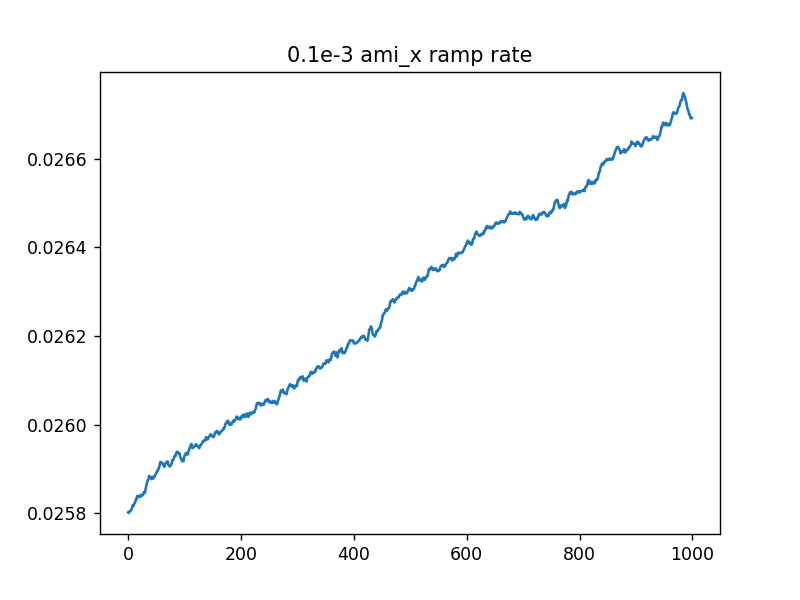

In [117]:
plt.figure('0.1e-3 ami_x ramp rate')
plt.title('0.1e-3 ami_x ramp rate')
plt.plot(T)

In [129]:
def setup():
    ami_x.ramp_rate(0.2e-3)
    #yoko1_ramp(0.6)
    lockin1_dc(0)            # voltage you want to apply (takes into account attenuation 100)
    lockin1.amplitude(2e-3)     # 1 MOhm of series resistance, so 1 V is converted to 1 uA
    time.sleep(3)

def cleanup(): 
    lockin1.amplitude(0)
    lockin1_dc(0)
    #yoko1_ramp(0.6)

@getter(('B_x', 'T'), ('T', 'K'), ('Lockin1_excitation', 'A'),
        ('g_xx', '2e^2/h'),
        ('R_xx', 'Ohm'),
        ('Lockin1_X', 'V'), ('Lockin1_Y', 'V'), ('Lockin1_R', 'V'), ('Lockin1_phase', 'deg'), 
       )
def measure_Ibias(attenuation=1e-6):
    time.sleep(0.3)
    Bx = ami_x.field()
    T = ls.ch09.temperature()
    Iac     = attenuation*lockin1.amplitude() #Ampere
    L1P     = lockin1.P()
    L1R     = lockin1.R()
    L1Y     = lockin1.Y()
    L1X     = lockin1.X()  
    Rxx = L1X/Iac # Ohm
    try:
        gxx = 12906/Rxx #[2e^2/h]
    except ZeroDivisionError:
        gxx = 0
    
    result  =  Bx, T, Iac, gxx, Rxx, L1X, L1Y, L1R, L1P
    return result

for i in range(2):
    result = do_experiment(
        "Q243_Bx_sweep_Gate_1V_{}/HB2".format(i),
        nest(
            sweep(field_sweep, field_window(ami_x, -0.15, 0.15)),
            measure(measure_Ibias)
        ),
        setup,
        cleanup,
        live_plot=False
    )

Starting experimental run with id: 3
Initializing (blocking) field to 0.15 T ...
Sweeping (non-blocking) field to -0.15 T ...
Starting experimental run with id: 4
Initializing (blocking) field to -0.15 T ...
Sweeping (non-blocking) field to 0.15 T ...


In [122]:
yoko1_ramp(1)

KeyboardInterrupt: 

In [47]:
def setup():    
    key1.NPLC(1)
    mdac_PG_voltage(1)
    lockin_dc(0)            # voltage you want to apply (takes into account attenuation 100)
    lockin1.amplitude(1e-3)     # 1 MOhm of series resistance, so 1 V is converted to 1 uA
    time.sleep(3)

def cleanup(): 
    lockin1.amplitude(0)
    lockin_dc(0)
    mdac_PG_voltage(0)


@getter(('B_x', 'T'),('Lockin1_excitation', 'A'), ('V_xx', 'V'), 
        ('g_xx', '2e^2/h'), ('g_xy_j1', '2e^2/h'), ('g_xy_j2', '2e^2/h'), ('g_j1j2', '2e^2/h'),
        ('R_xx', 'Ohm'), ('R_xy_j1', 'Ohm'), ('R_xy_j2', 'Ohm'), ('R_j1j2', 'Ohm'),
        ('Lockin1_X', 'V'), ('Lockin1_Y', 'V'), ('Lockin1_R', 'V'), ('Lockin1_phase', 'deg'), 
        ('Lockin2_X', 'V'), ('Lockin2_Y', 'V'), ('Lockin2_R', 'V'), ('Lockin2_phase', 'deg'),
        ('Lockin3_X', 'V'), ('Lockin3_Y', 'V'), ('Lockin3_R', 'V'), ('Lockin3_phase', 'deg'),
        ('Lockin4_X', 'V'), ('Lockin4_Y', 'V'), ('Lockin4_R', 'V'), ('Lockin4_phase', 'deg'),
       )
def measure_Ibias(Rseries=13e3, attenuation=1e-6):
    Bx = ami_x.field()
    Vxx_key = key1.volt()
    Iac     = attenuation*lockin1.amplitude() #Ampere
    L1P     = lockin1.P()
    L1R     = lockin1.R()
    L1Y     = lockin1.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L1X     = lockin1.X()  
    Rxx = L1X/Iac # Ohm
    try:
        gxx = 12906/Rxx #[2e^2/h]
    except ZeroDivisionError:
        gxx = 0
        
    L2P     = lockin2.P()
    L2R     = lockin2.R()
    L2Y     = lockin2.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L2X     = lockin2.X()  
    Rxy_junction2 = L2X/Iac # Ohm
    try:
        gxy_junction2 = 12906/Rxy_junction2 #[2e^2/h]
    except ZeroDivisionError:
        gxy_junction2 = 0
        
    L3P     = lockin3.P()
    L3R     = lockin3.R()
    L3Y     = lockin3.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L3X     = lockin3.X()  
    R_j1_j2 = L3X/Iac # Ohm
    try:
        g_j1_j2 = 12906/R_j1_j2 #[2e^2/h]
    except ZeroDivisionError:
        g_j1_j2 = 0

    L4P     = lockin4.P()
    L4R     = lockin4.R()
    L4Y     = lockin4.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L4X     = lockin4.X()  
    Rxy_junction1 = L4X/Iac # Ohm
    try:
        gxy_junction1 = 12906/Rxy_junction1 #[2e^2/h]
    except ZeroDivisionError:
        gxy_junction1 = 0
    
    result  =  Bx, Iac, Vxx_key, gxx, gxy_junction1, gxy_junction2, g_j1_j2, Rxx, Rxy_junction1, Rxy_junction2, R_j1_j2, L1X, L1Y, L1R, L1P, L2X, L2Y, L2R, L2P, L3X, L3Y, L3R, L3P, L4X, L4Y, L4R, L4P
    return result

for i in range(2):
    result = do_experiment(
        "Q243_Bx_sweep_Gate_1V_{}/HB3".format(i),
        nest(
            #sweep(mdac_PG_voltage, np.linspace(-0.2, 1, 141)),
            #sweep(ami_x, np.linspace(-1, 1, 201)),
            sweep(field_sweep, field_window(ami_x, -0.99, 0)),
            measure(measure_Ibias)
        ),
        setup,
        cleanup,
        live_plot=False
    )

Starting experimental run with id: 10
Initializing (blocking) field to -0.99 T ...
Sweeping (non-blocking) field to -0.95 T ...
Starting experimental run with id: 11
Initializing (blocking) field to -0.95 T ...
Sweeping (non-blocking) field to -0.99 T ...


In [71]:
def setup():    
    key1.NPLC(1)
    mdac_PG_voltage(1)
    lockin_dc(0)            # voltage you want to apply (takes into account attenuation 100)
    lockin1.amplitude(1e-3)     # 1 MOhm of series resistance, so 1 V is converted to 1 uA
    time.sleep(3)

def cleanup(): 
    lockin1.amplitude(0)
    lockin_dc(0)
    mdac_PG_voltage(0)


@getter(('B_x', 'T'),('Lockin1_excitation', 'A'), ('V_xx', 'V'), 
        ('g_xx', '2e^2/h'), ('g_xy_j1', '2e^2/h'), ('g_xy_j2', '2e^2/h'), ('g_j1j2', '2e^2/h'),
        ('R_xx', 'Ohm'), ('R_xy_j1', 'Ohm'), ('R_xy_j2', 'Ohm'), ('R_j1j2', 'Ohm'),
        ('Lockin1_X', 'V'), ('Lockin1_Y', 'V'), ('Lockin1_R', 'V'), ('Lockin1_phase', 'deg'), 
        ('Lockin2_X', 'V'), ('Lockin2_Y', 'V'), ('Lockin2_R', 'V'), ('Lockin2_phase', 'deg'),
        ('Lockin3_X', 'V'), ('Lockin3_Y', 'V'), ('Lockin3_R', 'V'), ('Lockin3_phase', 'deg'),
        ('Lockin4_X', 'V'), ('Lockin4_Y', 'V'), ('Lockin4_R', 'V'), ('Lockin4_phase', 'deg'),
       )
def measure_Ibias(Rseries=13e3, attenuation=1e-6):
    Bx = ami_x.field()
    Vxx_key = key1.volt()
    Iac     = attenuation*lockin1.amplitude() #Ampere
    L1P     = lockin1.P()
    L1R     = lockin1.R()
    L1Y     = lockin1.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L1X     = lockin1.X()  
    Rxx = L1X/Iac # Ohm
    try:
        gxx = 12906/Rxx #[2e^2/h]
    except ZeroDivisionError:
        gxx = 0
        
    L2P     = lockin2.P()
    L2R     = lockin2.R()
    L2Y     = lockin2.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L2X     = lockin2.X()  
    Rxy_junction1 = L2X/Iac # Ohm
    try:
        gxy_junction1 = 12906/Rxy_junction1 #[2e^2/h]
    except ZeroDivisionError:
        gxy_junction1 = 0
        
    L3P     = lockin3.P()
    L3R     = lockin3.R()
    L3Y     = lockin3.Y()
    # the above lines (excluding time.sleep) take at least 75ms to execute. 
    L3X     = lockin3.X()  
    R_j1_j2 = L3X/Iac # Ohm
    try:
        g_j1_j2 = 12906/R_j1_j2 #[2e^2/h]
    except ZeroDivisionError:
        g_j1_j2 = 0
    
    result  =  Bx, Iac, Vxx_key, gxx, gxy_junction1, g_j1_j2, Rxx, Rxy_junction1, R_j1_j2, L1X, L1Y, L1R, L1P, L2X, L2Y, L2R, L2P, L3X, L3Y, L3R, L3P,
    return result

#for i in range(2):
result = do_experiment(
    "Q243_Bx_sweep_Gate_1V_/HB1",#.format(i),
    nest(
        #sweep(mdac_PG_voltage, np.linspace(-0.5, 1, 151)),
        #sweep(ami_x, np.linspace(-1, 1, 201)),
        sweep(field_sweep, field_window(ami_x, -0.99, 0)),
        measure(measure_Ibias)
    ),
    setup,
    cleanup,
    live_plot=False
)

Starting experimental run with id: 25
Initializing (blocking) field to 0 T ...
Sweeping (non-blocking) field to -0.99 T ...


## Leakage test

In [215]:
initialize_leakage([TG2,TG1],[PG]) #first array the gates to set a voltage to, second the ones to open

In [31]:
def setup():
    key2.NPLC(10)
    mdac_PG_voltage(0)
    time.sleep(3)
    print('finished setup time =', time.time())

def cleanup(): 
    t = time.time()
    print('start cleanup time =', t)
    mdac_PG_voltage(0)
    elapsed = time.time() - t
    print('ramp down time =', elapsed)
    
@getter(('current', 'A'), ('raw_voltage_dc', 'V'))

def measure_acdc(gain=1e8):
    time.sleep(0.08)
    key_raw = key2.volt()
    current_dc = -key_raw/gain
    
    result  = current_dc, key_raw
    return result

result = do_experiment(
    "Q243_leakage_test/HB3",
    nest(
        sweep(mdac_PG_voltage, np.linspace(0, 1.8, 181)),
        measure(measure_acdc)
    ),
    setup,
    cleanup,
    live_plot=False
)

finished setup time = 1555695727.322483
Starting experimental run with id: 37
start cleanup time = 1555695879.569703
ramp down time = 39.65747332572937


# plotting data


In [38]:
import scipy.ndimage

qc.config["core"]["db_location"] = r'D:\OneDrive\BF3\Data\experiments_2019-04-10.db'
initialise_database()


data = load_by_id(16)

data.get_parameters()

[ParamSpec('AMI430_x_field', 'numeric', 'AMI430_x_field', 'T', inferred_from=[], depends_on=[]),
 ParamSpec('mdac_PG_voltage', 'numeric', 'mdac_PG_voltage', 'V', inferred_from=[], depends_on=[]),
 ParamSpec('Lockin1_excitation', 'numeric', 'Lockin1_excitation', 'A', inferred_from=[], depends_on=['AMI430_x_field', 'mdac_PG_voltage']),
 ParamSpec('V_xx', 'numeric', 'V_xx', 'V', inferred_from=[], depends_on=['AMI430_x_field', 'mdac_PG_voltage']),
 ParamSpec('g_xx', 'numeric', 'g_xx', '2e^2/h', inferred_from=[], depends_on=['AMI430_x_field', 'mdac_PG_voltage']),
 ParamSpec('g_xy_j1', 'numeric', 'g_xy_j1', '2e^2/h', inferred_from=[], depends_on=['AMI430_x_field', 'mdac_PG_voltage']),
 ParamSpec('g_xy_j2', 'numeric', 'g_xy_j2', '2e^2/h', inferred_from=[], depends_on=['AMI430_x_field', 'mdac_PG_voltage']),
 ParamSpec('g_j1j2', 'numeric', 'g_j1j2', '2e^2/h', inferred_from=[], depends_on=['AMI430_x_field', 'mdac_PG_voltage']),
 ParamSpec('R_xx', 'numeric', 'R_xx', 'Ohm', inferred_from=[], depen

In [92]:
B_X

array([[-0.99, -0.99, -0.99, ..., -0.99, -0.99, -0.99],
       [-0.98, -0.98, -0.98, ..., -0.98, -0.98, -0.98],
       [-0.97, -0.97, -0.97, ..., -0.97, -0.97, -0.97],
       ..., 
       [ 0.97,  0.97,  0.97, ...,  0.97,  0.97,  0.97],
       [ 0.98,  0.98,  0.98, ...,  0.98,  0.98,  0.98],
       [ 0.99,  0.99,  0.99, ...,  0.99,  0.99,  0.99]])

In [89]:
gate

array([[-0.3 , -0.29, -0.28, ..., -0.28, -0.29, -0.3 ],
       [-0.3 , -0.29, -0.28, ..., -0.28, -0.29, -0.3 ],
       [-0.3 , -0.29, -0.28, ..., -0.28, -0.29, -0.3 ],
       ..., 
       [-0.3 , -0.29, -0.28, ..., -0.28, -0.29, -0.3 ],
       [-0.3 , -0.29, -0.28, ..., -0.28, -0.29, -0.3 ],
       [-0.3 , -0.29, -0.28, ..., -0.28, -0.29, -0.3 ]])

<IPython.core.display.Javascript object>


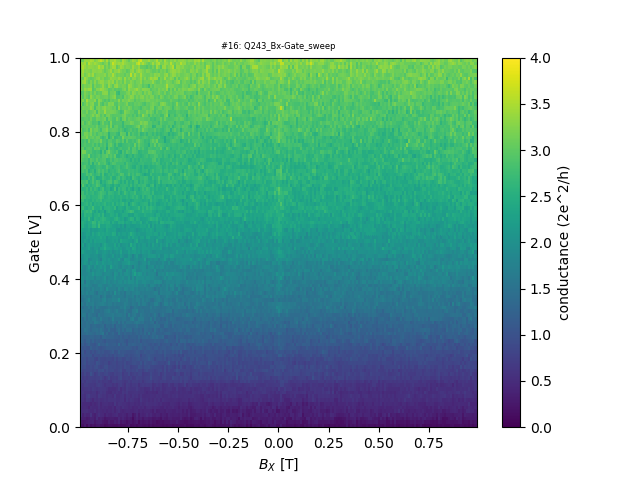

In [91]:
B_X = np.array(data.get_values('AMI430_x_field'))[:,0];
gate = np.array(data.get_values('mdac_PG_voltage'))[:,0];
G = np.array(data.get_values('g_xx'))[:,0];

dim_guess = sum([1*(B_X[0] == b) for b in B_X]);
dims = [int(gate.size / dim_guess), dim_guess];

B_X = B_X.reshape(*dims)[:,30:131];
gate = gate.reshape(*dims)[:,30:131];
G = G.reshape(*dims)[:,30:131];



plt.figure('Hall bar');
plt.pcolor(B_X, gate, G, vmin = 0, vmax = 4);
# plt.pcolor(lockin * 1e3, gate, G, vmin = 0, vmax = 1.2, cmap = 'seismic');
plt.colorbar().set_label('conductance (2e^2/h)');
plt.xlabel('$B_X$ [T]');
plt.ylabel('Gate [V]');
plt.title('#' + str(data.run_id) +': ' + data.exp_name, fontsize = 6);



<IPython.core.display.Javascript object>


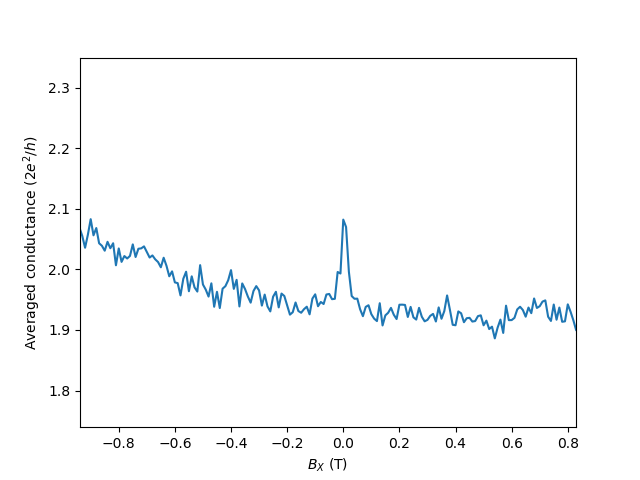

Text(0,0.5,'Averaged conductance ($2e^2/h$)')

In [96]:
plt.figure('RXX av')
plt.plot(B_X[:,0], np.mean(G, axis=1))
plt.xlabel('$B_X$ (T)')
plt.ylabel('Averaged conductance ($2e^2/h$)')

<IPython.core.display.Javascript object>


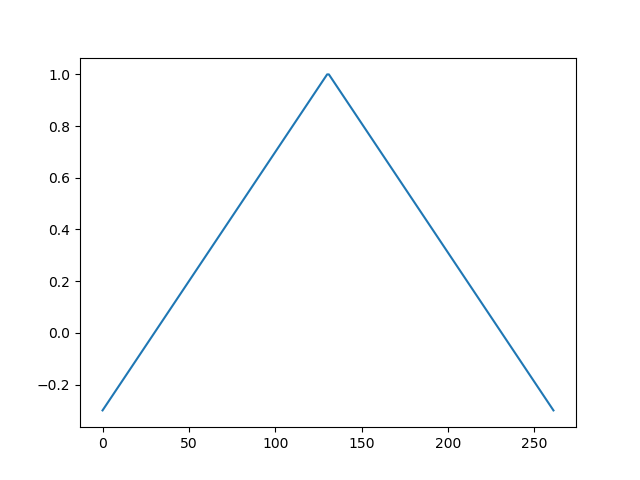

In [75]:
plt.figure()
plt.plot(gate[0,:])

In [60]:
T_probe.temperature()

FileNotFoundError: [Errno 2] No such file or directory: 'Y:\\\\19-04-26\\CH9 T 19-04-26.log'

In [ ]:
# Constant bias linecuts
Vgi = np.unique(gate);
Vb0, Vg0 = int(dims[1] / 4 * 2), dims[0]; # pixel coords
Vb1, Vg1 = int(dims[1] / 4 * 2), 0; # pixel coords
x, y = np.linspace(Vg0, Vg1, Vgi.size), np.linspace(Vb0, Vb1, Vgi.size); # original data is 90 deg rotated
Gi = scipy.ndimage.map_coordinates(G, np.vstack((x,y)))

plt.figure('qpc_diamonds_linecuts');
plt.plot(Vgi, Gi, 'b');
plt.xlabel('Gate [V]');
plt.ylabel('Conductance [G$_0$]');
plt.title('Linecut')#at V$_b$ = '+str(np.array(bias).tolist()[0][Vb0])+' [V]');
plt.grid(True);